In [3]:
# import all libraries
# pandas for handling data frames
import pandas as pd 

# import graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt

# import stats libraries to conduct stats tests
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

# sklearn models to create the prediction model
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# these following sklearn metrics measures the accuracy of the prediction
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# load the dataset
df = pd.read_csv("diabetes_data_upload.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
replace = {"Gender": "isMale"}
df = df.rename(columns=replace)

df.columns = df.columns.str.lower()
df

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
# replace the yes and no into 0 and 1
df = df.replace("No", 0)
df = df.replace("Yes", 1)

df = df.replace("Positive", 1)
df = df.replace("Negative", 0)

# consider Gender as isMale
df = df.replace("Male", 1)
df = df.replace("Female", 0)
df

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [7]:
# check for missing data
df.isnull().sum()

age                   0
ismale                0
polyuria              0
polydipsia            0
sudden weight loss    0
weakness              0
polyphagia            0
genital thrush        0
visual blurring       0
itching               0
irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [ ]:
# check the data types of the columns
df.dtypes

In [ ]:
# examine age with sample mean, sample median, and a histogram
print(df['age'].mean())
print(df['age'].median())
plt.hist(df['age'])

In [ ]:
print(df['age'].mean())
print(df['age'].median())

In [ ]:
# create a countplot for the binary variable columns
cols = df.columns[1:]
for col in cols:
    sns.countplot(x = df[col])
    plt.title(col)
    sns.despine()
    plt.show()

In [ ]:
# is obesity related to diabetes
# is age related to diabetes

In [ ]:
obesity_class_crosstab = pd.crosstab(df['class'], df['obesity'])
chi2_contingency(obesity_class_crosstab)
# the results is chi2, p-value, degree of freedom, expected, respectively

In [ ]:
ismale_class_crosstab = pd.crosstab(df['class'], df['ismale'])
chi2_contingency(ismale_class_crosstab)
# the results is chi2, p-value, degree of freedom, expected, respectively

In [ ]:
polyuria_class_crosstab = pd.crosstab(df['class'], df['polyuria'])
chi2_contingency(polyuria_class_crosstab)
# the results is chi2, p-value, degree of freedom, expected, respectively

In [ ]:
polyuria_class_crosstab = pd.crosstab(df['class'], df['polydipsia'])
chi2_contingency(polyuria_class_crosstab)
# the results is chi2, p-value, degree of freedom, expected, respectively

In [ ]:
polyuria_ismale_crosstab = pd.crosstab(df['ismale'], df['polyuria'])
chi2_contingency(polyuria_ismale_crosstab)
# the results is chi2, p-value, degree of freedom, expected, respectively

In [ ]:
# is there a relationship between age and diabetes
sns.boxplot(x = df["class"], y = df["age"])

In [ ]:
no_diabetes = df[df["class"] == 0]
print(no_diabetes['age'].mean())
print(no_diabetes['age'].median())

In [ ]:
diabetes = df[df["class"] == 1]
print(diabetes['age'].mean())
print(diabetes['age'].median())

In [ ]:
qqplot(df["age"], fit=True, line="s")
plt.show()

In [ ]:
# conduct z test of difference 
ztest(diabetes['age'], no_diabetes['age']) 
# result is z score and p-value, respectively
# we can reject the null hypothesis with this result

In [8]:
# get a correlation plot
df.corr()

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
ismale,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


<AxesSubplot: >

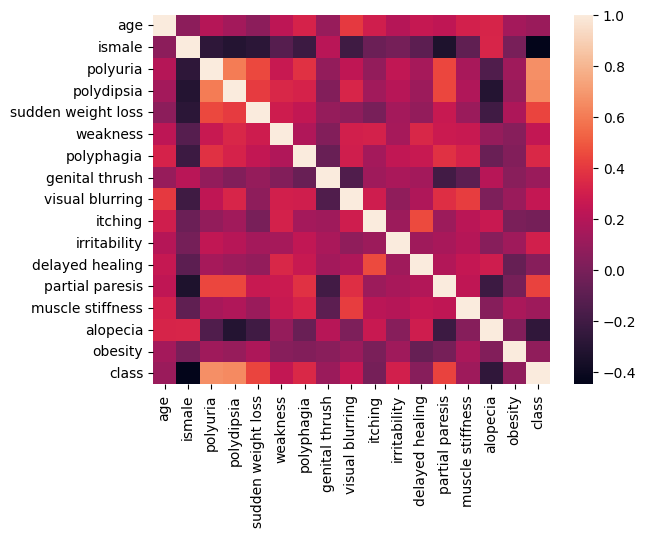

In [9]:
sns.heatmap(df.corr())

In [ ]:
X = df.drop('class', axis=1)
Y = df['class']

In [ ]:
# split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [ ]:
# begin our model training 
# start with dummy classifier to establish baseline
dummy = DummyClassifier()
dummy.fit(X_train, Y_train)
dummy_pred = dummy.predict(X_test)

print(confusion_matrix(Y_test, dummy_pred))
print(classification_report(Y_test, dummy_pred, zero_division=0.0))

In [ ]:
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train, Y_train)
logr_pred = logr.predict(X_test)

print(confusion_matrix(Y_test, logr_pred))
print(classification_report(Y_test, logr_pred))

In [ ]:
# try decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)

print(confusion_matrix(Y_test, tree_pred))
print(classification_report(Y_test, tree_pred))

In [ ]:
# try random forest
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
forest_pred = forest.predict(X_test)

print(confusion_matrix(Y_test, forest_pred))
print(classification_report(Y_test, forest_pred))

In [ ]:
pd.DataFrame({  'feature': X.columns,
                'importance': forest.feature_importances_}).sort_values('importance', ascending=False)